In [38]:
#Imports
import sys #Python
import sklearn #Machine learning library
import numpy as np #numerical packages in python
import scipy as scp #Another numerical package, unused directly but is implicitly used in sklearn
import pandas as pd #Package for data manipulation and analysis
import matplotlib.pyplot as plt # plotting library
import os
import time
import random 
import math

# SKlearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [39]:
#Load Data
data = pd.read_csv('./pathloss_data_5G.csv')
data.head()

,tx_lat,tx_lon,tx_el,rx_lat,rx_lon,rx_el,frequency_Hz,pathloss_dB,pl_los_index,propagation_delay_s,propagation_distance_m,rays_count,h_bar,SNR_dB,capacity,loss_dB
0,34.07,-118.44270,112.617782,34.0674,-118.44225,109.278807,5000000000,146.999461,1,0.000001,343.431802,44,0.0,-inf,0.0,NaN
1,34.07,-118.44265,112.807114,34.0674,-118.44225,109.278807,5000000000,146.599736,1,0.000001,339.071364,45,0.0,-inf,0.0,NaN
2,34.07,-118.44260,112.996442,34.0674,-118.44225,109.278807,5000000000,146.174525,1,0.000001,334.744002,47,0.0,-inf,0.0,NaN
3,34.07,-118.44255,113.185765,34.0674,-118.44225,109.278807,5000000000,145.720559,1,0.000001,330.456330,59,0.0,-inf,0.0,NaN
4,34.07,-118.44250,113.375084,34.0674,-118.44225,109.278807,5000000000,145.234061,1,0.000001,326.216763,76,0.0,-inf,0.0,NaN


In [40]:
# Remove entries that have -inf or inf values
data = data.drop('loss_dB', axis=1)
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Replace entries with a pl_los_index greater than 1 with 0
data.loc[data["pl_los_index"] > 1, "pl_los_index"] = 0

In [41]:
data.head()

,tx_lat,tx_lon,tx_el,rx_lat,rx_lon,rx_el,frequency_Hz,pathloss_dB,pl_los_index,propagation_delay_s,propagation_distance_m,rays_count,h_bar,SNR_dB,capacity
9,34.07,-118.44225,114.321714,34.0674,-118.44225,109.278807,5000000000,129.480152,0,1.165792e-06,349.495624,35,0.018281,-38.440902,6.903852e-08
10,34.07,-118.44220,114.495168,34.0674,-118.44225,109.278807,5000000000,119.485115,0,9.813725e-07,294.208084,37,0.083051,-16.664831,2.144636e-04
11,34.07,-118.44215,114.571634,34.0674,-118.44225,109.278807,5000000000,109.905896,0,1.040409e-06,311.906721,32,0.084940,-7.692089,1.769793e-03
12,34.07,-118.44210,114.648095,34.0674,-118.44225,109.278807,5000000000,99.555367,0,9.750255e-07,292.305294,13,0.088087,2.481949,1.968925e-02
13,34.07,-118.44205,114.724552,34.0674,-118.44225,109.278807,5000000000,95.646587,1,9.641608e-07,289.048151,19,0.094374,5.405751,4.393682e-02


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 9 to 1019
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tx_lat                  968 non-null    float64
 1   tx_lon                  968 non-null    float64
 2   tx_el                   968 non-null    float64
 3   rx_lat                  968 non-null    float64
 4   rx_lon                  968 non-null    float64
 5   rx_el                   968 non-null    float64
 6   frequency_Hz            968 non-null    int64  
 7   pathloss_dB             968 non-null    float64
 8   pl_los_index            968 non-null    int64  
 9   propagation_delay_s     968 non-null    float64
 10  propagation_distance_m  968 non-null    float64
 11  rays_count              968 non-null    int64  
 12  h_bar                   968 non-null    float64
 13  SNR_dB                  968 non-null    float64
 14  capacity                968 non-null    float6

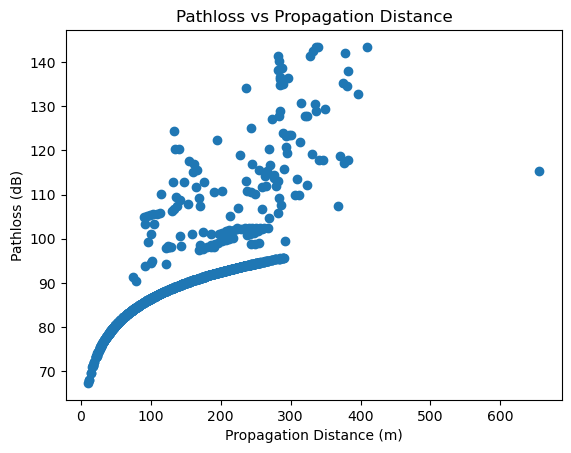

In [43]:
plt.plot(data['propagation_distance_m'], data['pathloss_dB'], 'o')
plt.xlabel('Propagation Distance (m)')
plt.ylabel('Pathloss (dB)')
plt.title('Pathloss vs Propagation Distance')
plt.show()

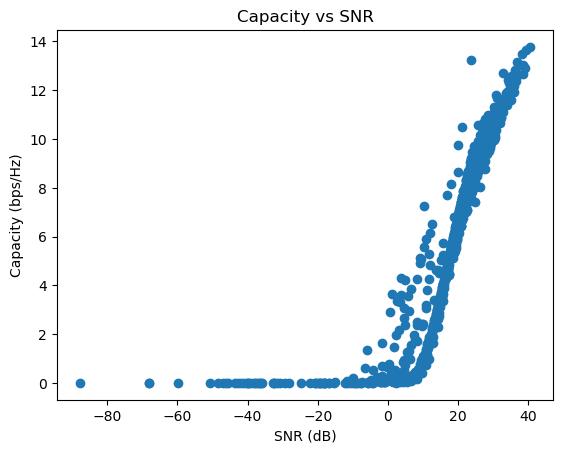

In [44]:
plt.plot(data['SNR_dB'], data['capacity'], 'o')
plt.xlabel('SNR (dB)')
plt.ylabel('Capacity (bps/Hz)')
plt.title('Capacity vs SNR')
plt.show()

In [45]:
dataLOS = data[data['pl_los_index'] == 1]

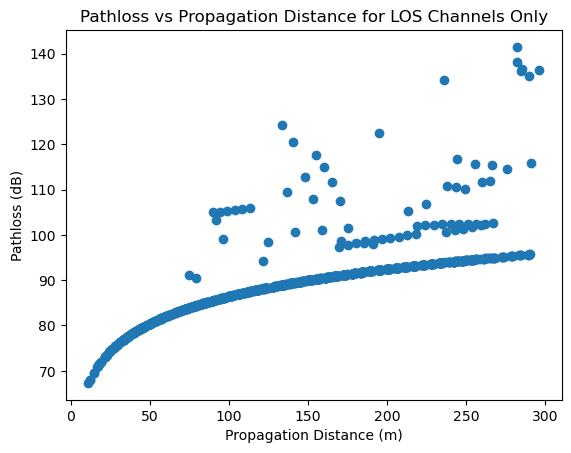

In [46]:
plt.plot(dataLOS['propagation_distance_m'], dataLOS['pathloss_dB'], 'o')
plt.xlabel('Propagation Distance (m)')
plt.ylabel('Pathloss (dB)')
plt.title('Pathloss vs Propagation Distance for LOS Channels Only')
plt.show()

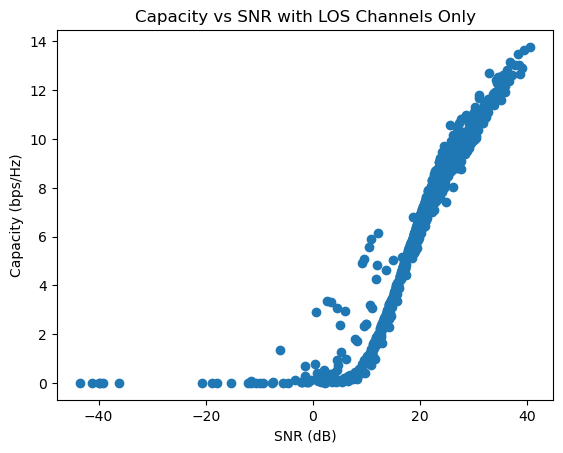

In [47]:
plt.plot(dataLOS['SNR_dB'], dataLOS['capacity'], 'o')
plt.xlabel('SNR (dB)')
plt.ylabel('Capacity (bps/Hz)')
plt.title('Capacity vs SNR with LOS Channels Only')
plt.show()

In [48]:
#Preprocess Data
data = data.drop("frequency_Hz", axis=1)
data = data.drop("rays_count", axis=1)
#data = data.drop('loss_dB', axis=1)
data = data.drop('SNR_dB', axis=1)
data = data.drop('h_bar', axis=1)
data = data.drop('propagation_delay_s', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 9 to 1019
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tx_lat                  968 non-null    float64
 1   tx_lon                  968 non-null    float64
 2   tx_el                   968 non-null    float64
 3   rx_lat                  968 non-null    float64
 4   rx_lon                  968 non-null    float64
 5   rx_el                   968 non-null    float64
 6   pathloss_dB             968 non-null    float64
 7   pl_los_index            968 non-null    int64  
 8   propagation_distance_m  968 non-null    float64
 9   capacity                968 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 83.2 KB


In [49]:
R = 6371000  # Earth radius in meters

def north_south_distance(lat1, lat2):
    """
    Compute north–south distance (meters) due only to change in latitude.
    Positive if lat2 is north of lat1.
    """
    dlat = math.radians(lat2 - lat1)
    return dlat * R


def east_west_distance(lat1, lon1, lon2):
    """
    Compute east–west distance (meters) due only to change in longitude.
    Positive if lon2 is east of lon1.
    Uses the latitude (lat1) to scale longitude distance.
    """
    dlon = math.radians(lon2 - lon1)
    lat_rad = math.radians(lat1)
    return dlon * R * math.cos(lat_rad)

def elevation_difference(ele1, ele2):
    """
    Compute elevation difference (meters).
    Positive if ele2 is above ele1.
    """
    return ele2 - ele1

data['ns_distance'] = data.apply(lambda row: north_south_distance(row['rx_lat'], row['tx_lat']), axis=1)
data['ew_distance'] = data.apply(lambda row: east_west_distance(row['tx_lat'], row['rx_lon'], row['tx_lon']), axis=1)
data['elevation_diff'] = data.apply(lambda row: elevation_difference(row['rx_el'], row['tx_el']), axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 9 to 1019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tx_lat                  968 non-null    float64
 1   tx_lon                  968 non-null    float64
 2   tx_el                   968 non-null    float64
 3   rx_lat                  968 non-null    float64
 4   rx_lon                  968 non-null    float64
 5   rx_el                   968 non-null    float64
 6   pathloss_dB             968 non-null    float64
 7   pl_los_index            968 non-null    int64  
 8   propagation_distance_m  968 non-null    float64
 9   capacity                968 non-null    float64
 10  ns_distance             968 non-null    float64
 11  ew_distance             968 non-null    float64
 12  elevation_diff          968 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 105.9 KB


In [50]:
data = data.drop(['tx_lat', 'tx_lon', 'tx_el', 'rx_lat', 'rx_lon', 'rx_el'], axis=1)
data = data.drop('propagation_distance_m', axis=1)
data.head(20)

,pathloss_dB,pl_los_index,capacity,ns_distance,ew_distance,elevation_diff
9,129.480152,0,6.903852e-08,289.106809,0.000000,5.042907
10,119.485115,0,2.144636e-04,289.106809,4.605437,5.216362
11,109.905896,0,1.769793e-03,289.106809,9.210874,5.292827
12,99.555367,0,1.968925e-02,289.106809,13.816311,5.369288
13,95.646587,1,4.393682e-02,289.106809,18.421747,5.445745
14,95.656586,1,1.498111e-01,289.106809,23.027184,5.522198
15,95.668766,1,6.917807e-02,289.106809,27.632621,5.598654
16,95.683110,1,9.096203e-03,289.106809,32.238058,5.675121
17,115.848816,1,5.617726e-05,289.106809,36.843495,5.751583
18,117.864215,0,2.001818e-07,289.106809,41.448932,5.828034


In [51]:
#Split target and data
data_pathloss = data["pathloss_dB"]
data_capacity = data["capacity"]
data_geo = data.drop(["pathloss_dB", "capacity"], axis = 1)

In [52]:
# Train an MLP for pathloss
#Train test split 
train_raw, test_raw, target_pl, target_pl_test = train_test_split(data_geo, data_pathloss, test_size=0.2, random_state=0)

In [53]:
#Standardize data
#Since all features are real-valued, we only have one pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

#Transform raw data 
train = pipeline.fit_transform(train_raw)
test = pipeline.transform(test_raw) #Note that there is no fit calls

#Names of Features after Pipeline
feature_names = list(pipeline.get_feature_names_out(list(data_geo.columns)))

In [54]:
regr_pl = MLPRegressor(hidden_layer_sizes=(100,), max_iter = 100000)
regr_pl.fit(train, target_pl)
predicted_pl = regr_pl.predict(test)

In [55]:
print("%-12s %f" % ('Accuracy:', r2_score(target_pl_test,predicted_pl)))

Accuracy:    0.862899


In [56]:
# Now train an MLP for capacity
train_raw, test_raw, target_cap, target_cap_test = train_test_split(data_geo, data_capacity, test_size=0.2, random_state=0)

In [57]:
#Standardize data
#Since all features are real-valued, we only have one pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

#Transform raw data 
train = pipeline.fit_transform(train_raw)
test = pipeline.transform(test_raw) #Note that there is no fit calls

#Names of Features after Pipeline
feature_names = list(pipeline.get_feature_names_out(list(data_geo.columns)))

In [58]:
regr_cap = MLPRegressor(hidden_layer_sizes=(100,), max_iter = 100000)
regr_cap.fit(train, target_cap)
predicted_cap = regr_cap.predict(test)

In [59]:
print("%-12s %f" % ('Accuracy:', r2_score(target_cap_test,predicted_cap)))

Accuracy:    0.837896


In [60]:
target_cap_test

1008    12.647447
330      5.788031
31       0.007924
732      8.228389
390      6.550206
          ...    
765      9.939334
773      8.489092
35       0.159960
442      4.975541
700      5.580775
Name: capacity, Length: 194, dtype: float64

In [61]:
# MCS Table
rlog2M = [0, 0.194, 0.248, 0.312, 0.401, 0.500, 0.618, 0.737, 0.856, 0.957, 1.075, 1.233, 1.411, 1.589, 1.767, 2.000, 2.089, 2.267, 2.533, 2.711, 2.944, 3.181, 3.537, 3.780, 3.928, 4.225, 4.373, 5.070]
r = [0, 0.097, 0.124, 0.156, 0.206, 0.250, 0.309, 0.368, 0.428, 0.478, 0.538, 0.617, 0.353, 0.397, 0.442, 0.500, 0.522, 0.567, 0.633, 0.678, 0.736, 0.795, 0.589, 0.630, 0.655, 0.704, 0.729, 0.845]
M = [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 64, 64, 64, 64, 64, 64]

In [62]:
for i in range(len(predicted_cap)):
    mcs_idx = 0
    for j in range(len(rlog2M)):
        if predicted_cap[i] >= rlog2M[j]:
            mcs_idx = j
   
    print(f"Predicted Capacity: {predicted_cap[i]:.2f}, MCS Index: {mcs_idx}, M: {M[mcs_idx]}, r: {r[mcs_idx]:.3f}")

Predicted Capacity: 12.48, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.73, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 0.30, MCS Index: 2, M: 4, r: 0.124
Predicted Capacity: 8.67, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.62, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.90, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 9.53, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 6.23, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.57, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.58, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 0.88, MCS Index: 8, M: 4, r: 0.428
Predicted Capacity: 10.64, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 5.08, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 6.41, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 7.92, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 6.28, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 8.91, MCS Index: 27, M: 64, r: 0.845
Predicted Capacity: 11.31, MCS In